# Linear Regression using statsmodel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mobile Phone Price (1).csv')
print(df)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [5]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [6]:
df.shape

(407, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [8]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(26)

# EDA

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery Capacity (mAh),407.0,4676.476658,797.193713,1821.0,4300.0,5000.0,5000.0,7000.0


In [12]:
df.describe(include='object')

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Price ($)
count,407,407,407,407,407,407,407
unique,16,239,13,20,41,143,89
top,Samsung,Poco X3 Pro,128GB,4GB,6.5,13MP + 2MP + 2MP,$149
freq,79,6,125,68,108,29,18


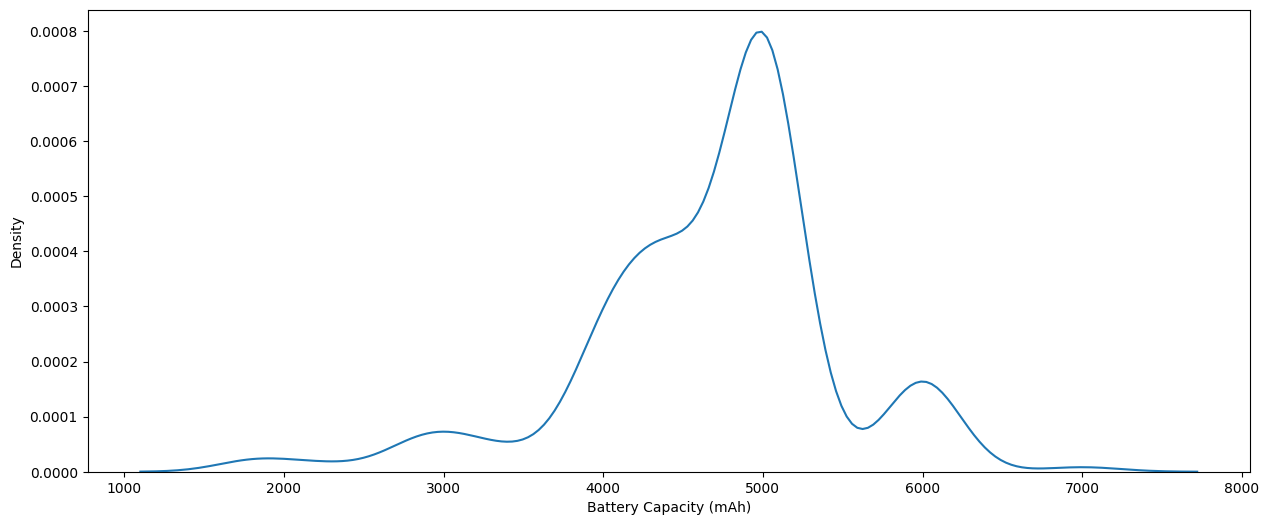

In [15]:
import warnings

warnings.filterwarnings("ignore")

for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(15,6))
    sns.kdeplot(data=df,x=i)
    plt.show()

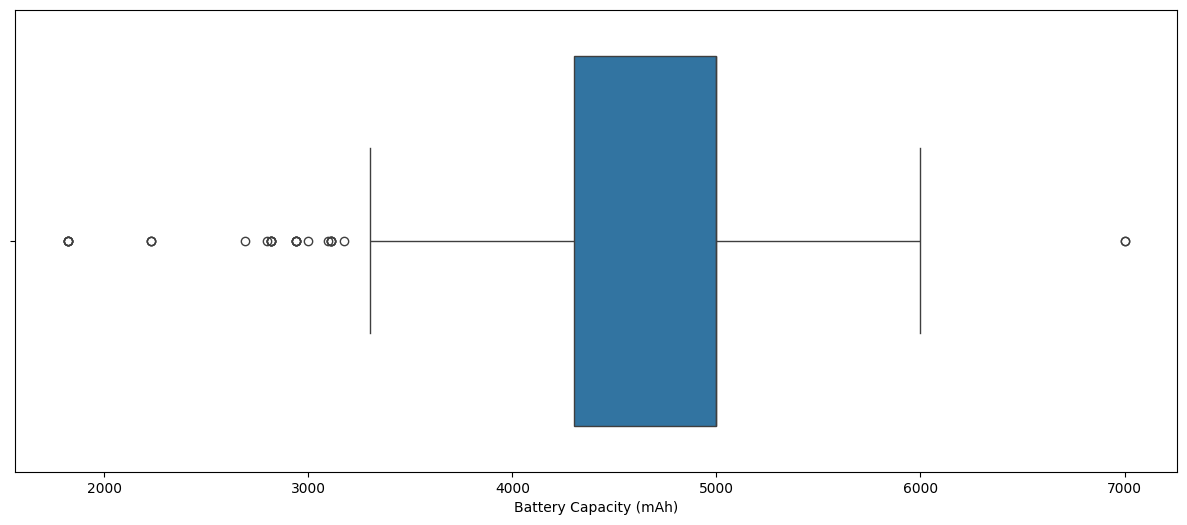

In [17]:
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df,x=i)
    plt.show()

In [18]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

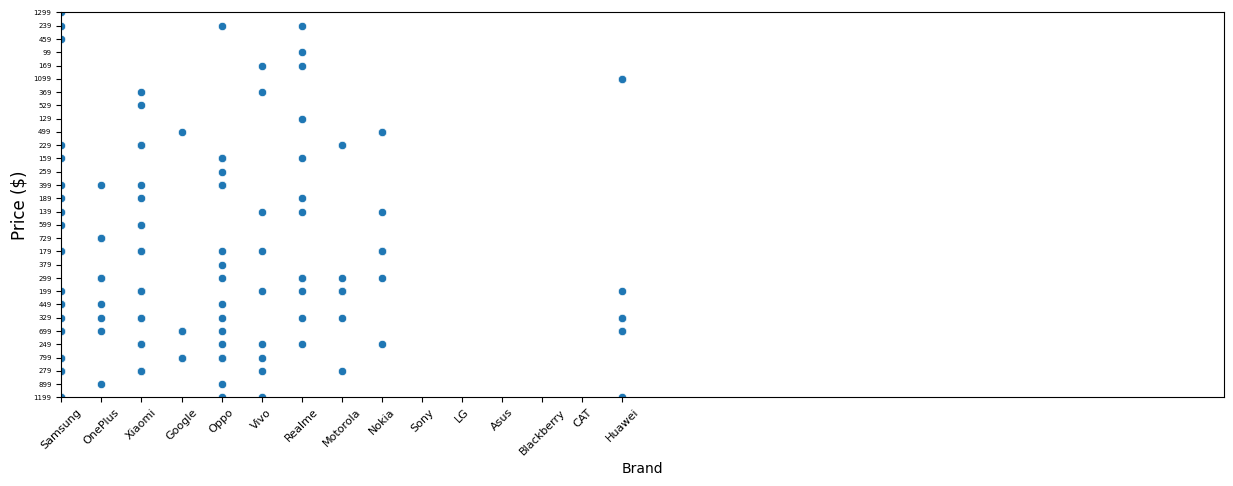

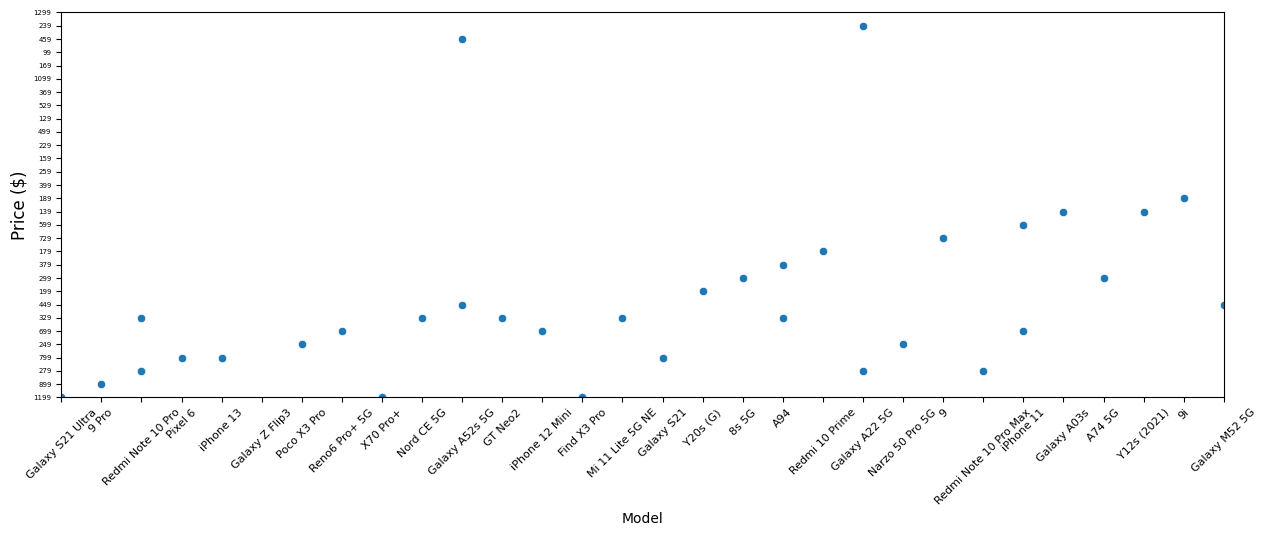

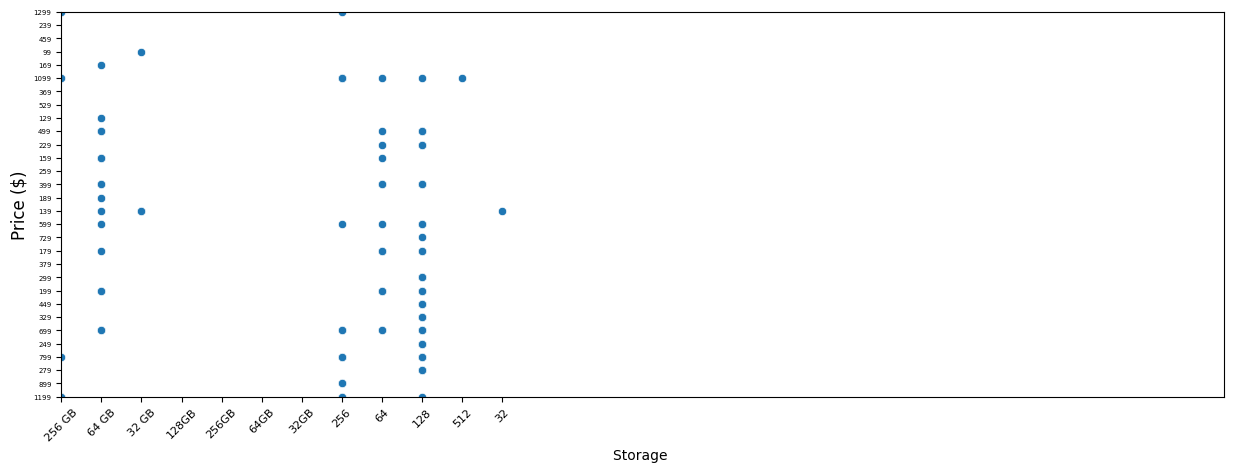

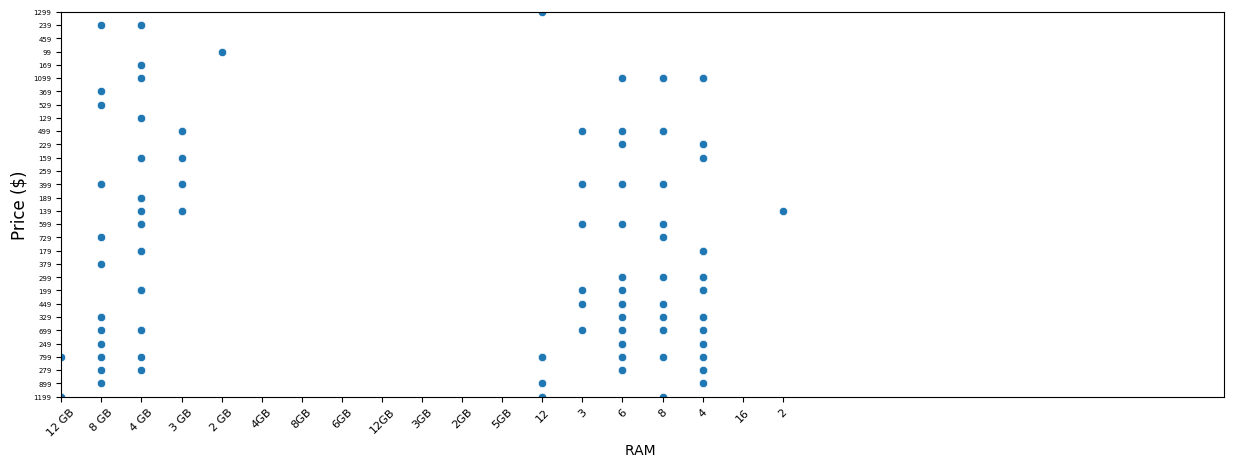

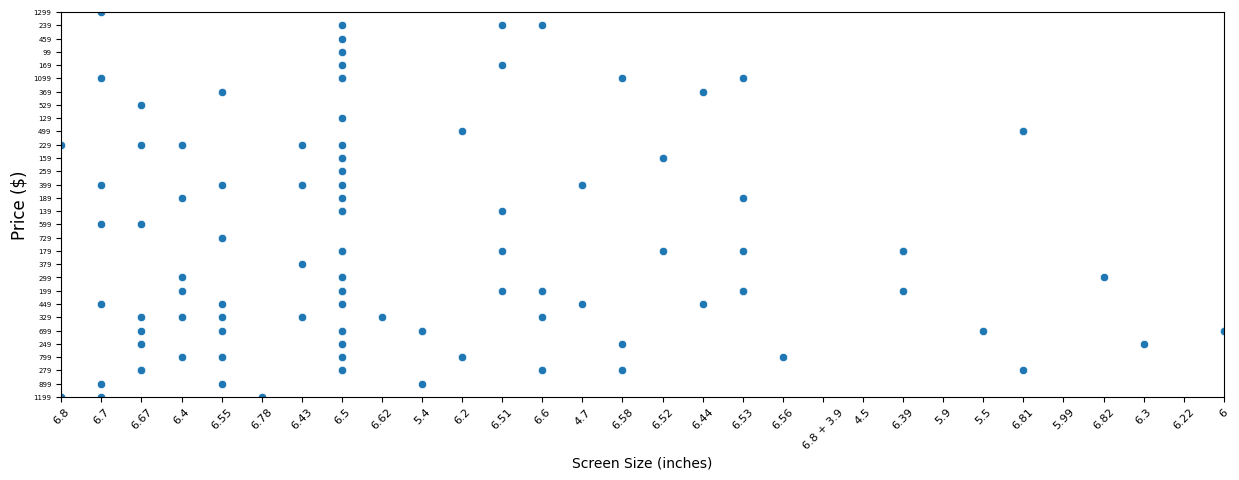

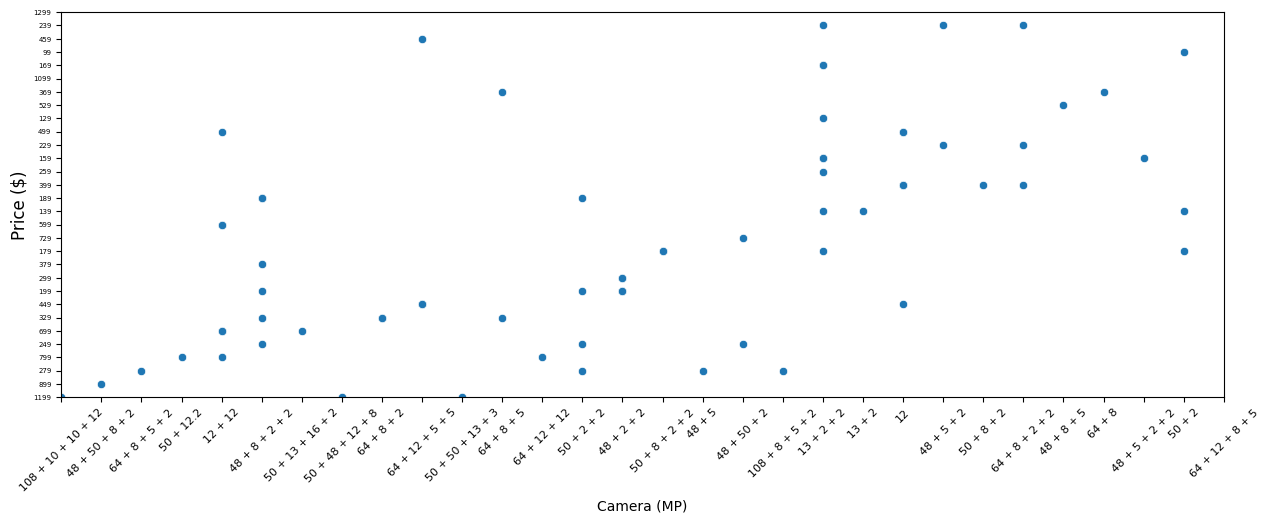

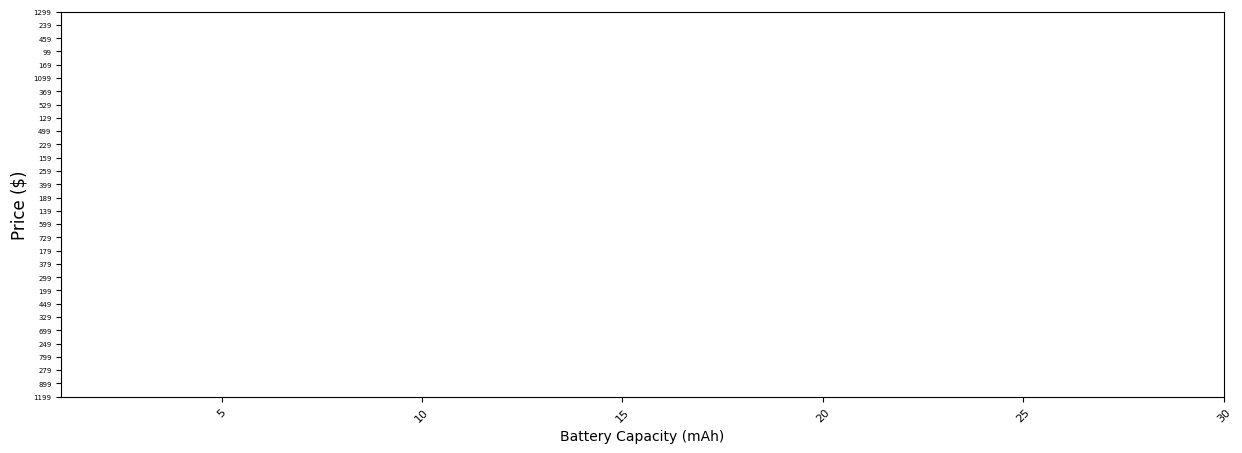

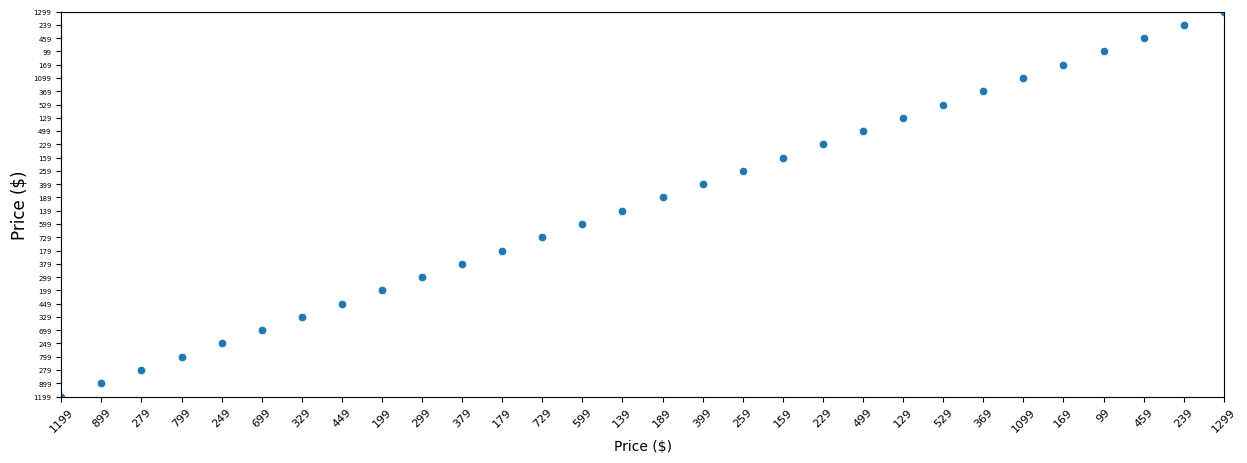

In [40]:
for i in ['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)','Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)']:
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=df,y="Price ($)",x=i)
    plt.xticks(rotation=45,fontsize=8)
    plt.ylabel("Price ($)",fontsize=12)
    plt.yticks(fontsize=5)
    plt.ylim(1,30)
    plt.xlim(1,30)
    plt.show()

In [41]:
df.select_dtypes(include='number').columns

Index(['Battery Capacity (mAh)'], dtype='object')

In [152]:
# Assuming df is your DataFrame
corr_matrix = df.select_dtypes(include="number").corr()

# Display the correlation matrix
print(corr_matrix)


                        Battery Capacity (mAh)
Battery Capacity (mAh)                     1.0


In [155]:
# Assuming df is your DataFrame and it has numeric columns
corr_matrix = df.select_dtypes(include="number").corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


In [153]:
#Correlation 

#plt.figure(figsize=(10,10))
#sns.heatmap(data=df.select_dtypes(include = "number").corr(),annot=True,mask = np.triu(np.ones_like(Battery Capacity (mAh), dtype=bool)))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1330486563.py, line 4)

In [56]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [58]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [59]:
df['Brand'].value_counts()

Brand
Samsung       79
Xiaomi        67
Oppo          56
Realme        43
Vivo          35
Apple         30
Nokia         28
Motorola      23
OnePlus       15
Huawei        12
Google         7
Asus           4
Blackberry     3
LG             3
Sony           1
CAT            1
Name: count, dtype: int64

In [60]:
df.drop('Brand',axis=1,inplace=True)

In [62]:
df.select_dtypes(include='object').columns

Index(['Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)',
       'Price ($)'],
      dtype='object')

In [63]:
df['Model']=df['Model'].replace(['yes','no'],[1,0])

In [64]:
df

,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...
402,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Reno3,128,8,6.4,48+13+8+2,4025,429


In [74]:
dummy = pd.get_dummies(data=df,columns=['Camera (MP)'],drop_first=True)


In [73]:
dummy

,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),Camera (MP)_108 + 8 + 5 + 2,Camera (MP)_108+10+10+12,Camera (MP)_108+12+12,Camera (MP)_108+13+5,...,Camera (MP)_64MP + 2MP,Camera (MP)_64MP + 5MP + 2MP + 2MP,Camera (MP)_64MP + 8MP,Camera (MP)_64MP + 8MP + 2MP,Camera (MP)_64MP + 8MP + 2MP + 2MP,Camera (MP)_64MP + 8MP + 5MP,Camera (MP)_64MP + 8MP + 5MP + 2MP,Camera (MP)_64MP + 8MP + 5MP + 5MP,Camera (MP)_8MP,Camera (MP)_8MP + 2MP
0,iPhone 13 Pro,128 GB,6 GB,6.1,3095,999,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Galaxy S21 Ultra,256 GB,12 GB,6.8,5000,1199,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9 Pro,128 GB,8 GB,6.7,4500,899,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Redmi Note 10 Pro,128 GB,6 GB,6.67,5020,279,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Pixel 6,128 GB,8 GB,6.4,4614,799,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Galaxy Note20 5G,128,8,6.7,4300,1049,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
403,Mi 10 Lite 5G,128,6,6.57,4160,349,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
404,iPhone 12 Pro Max,128,6,6.7,3687,1099,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
405,Reno3,128,8,6.4,4025,429,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
dummy.dtypes

Model                                 object
Storage                               object
RAM                                   object
Screen Size (inches)                  object
Battery Capacity (mAh)                 int64
                                       ...  
Camera (MP)_64MP + 8MP + 5MP            bool
Camera (MP)_64MP + 8MP + 5MP + 2MP      bool
Camera (MP)_64MP + 8MP + 5MP + 5MP      bool
Camera (MP)_8MP                         bool
Camera (MP)_8MP + 2MP                   bool
Length: 148, dtype: object

In [77]:
print(dummy['Price ($)'].dtype)

object


In [78]:
dummy['Price ($)'] = pd.to_numeric(dummy['Price ($)'], errors='coerce')

In [80]:
dummy = dummy.dropna(subset=['Price ($)'])

In [81]:
dummy['Log Price ($)'] = np.log(dummy['Price ($)'])

# Data is ready to fit to the Model

<Axes: xlabel='Price ($)', ylabel='Density'>

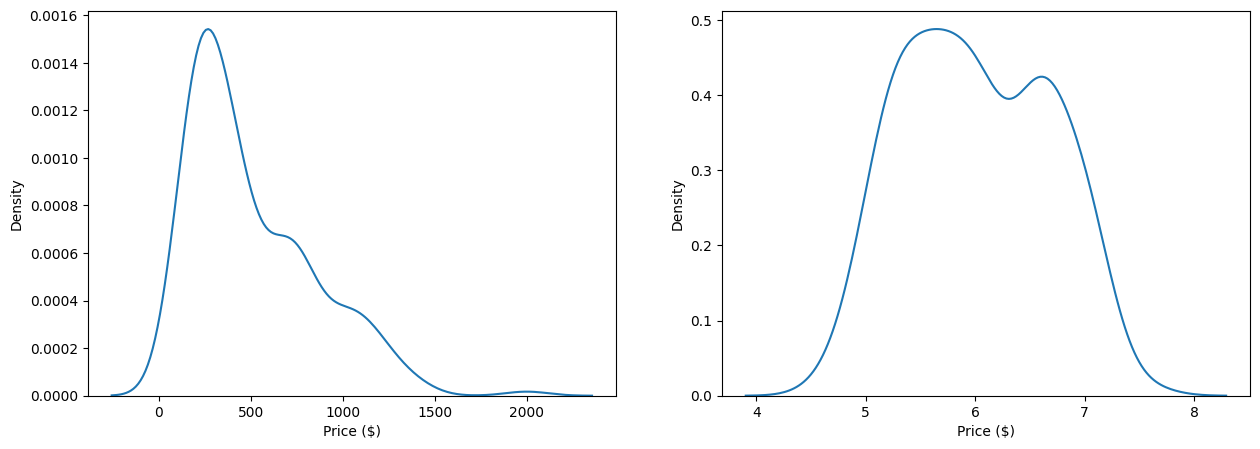

In [83]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(x=dummy['Price ($)'])

plt.subplot(1,2,2)
sns.kdeplot(x=np.log(dummy['Price ($)']))

# Log Transformation to reduce the Skewness in the target Variable is done

In [85]:
dummy['Price ($)'] = np.log(dummy['Price ($)'])


# Import StatsModel Library and Other Module to Fit Model

In [86]:
dummy.columns

Index(['Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Price ($)', 'Camera (MP)_108 + 8 + 5 + 2',
       'Camera (MP)_108+10+10+12', 'Camera (MP)_108+12+12',
       'Camera (MP)_108+13+5',
       ...
       'Camera (MP)_64MP + 5MP + 2MP + 2MP', 'Camera (MP)_64MP + 8MP',
       'Camera (MP)_64MP + 8MP + 2MP', 'Camera (MP)_64MP + 8MP + 2MP + 2MP',
       'Camera (MP)_64MP + 8MP + 5MP', 'Camera (MP)_64MP + 8MP + 5MP + 2MP',
       'Camera (MP)_64MP + 8MP + 5MP + 5MP', 'Camera (MP)_8MP',
       'Camera (MP)_8MP + 2MP', 'Log Price ($)'],
      dtype='object', length=149)

In [87]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [89]:
x = dummy.drop('Price ($)',axis=1)
y = dummy['Price ($)']

In [90]:
x_c = sm.add_constant(x)

# Split the Data into train and test

In [106]:
x_train,x_test,y_train,y_test= train_test_split(x_c,y,test_size=30,random_state=42)

# Fit the Model

In [107]:
print(x_train.dtypes)


const                                 float64
Model                                  object
Storage                                object
RAM                                    object
Screen Size (inches)                   object
                                       ...   
Camera (MP)_64MP + 8MP + 5MP + 2MP       bool
Camera (MP)_64MP + 8MP + 5MP + 5MP       bool
Camera (MP)_8MP                          bool
Camera (MP)_8MP + 2MP                    bool
Log Price ($)                         float64
Length: 149, dtype: object


In [108]:
x_train = pd.get_dummies(x_train, drop_first=True)


In [109]:
from sklearn.preprocessing import LabelEncoder
for col in x_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])


In [110]:
x_train = x_train.fillna(0)  # Replace NaNs with 0 or a suitable value


In [111]:
x_train = x_train.dropna()


In [112]:
x_train = x_train.astype(float)


In [113]:
model = sm.OLS(y_train, x_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Price ($)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.737e+23
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.24e-223
Time:                        20:25:24   Log-Likelihood:                 4581.5
No. Observations:                 167   AIC:                            -8867.
Df Residuals:                      19   BIC:                            -8406.
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [114]:
model = sm.OLS(y_train,x_train.astype(float)).fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price ($)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.737e+23
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.24e-223
Time:                        20:25:30   Log-Likelihood:                 4581.5
No. Observations:                 167   AIC:                            -8867.
Df Residuals:                      19   BIC:                            -8406.
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -3.642e-12   1.49e-11     -0.244      0.810   -3.48e-11    2.76e-11
Battery Capacity (mAh)                 -2.207e-16   1.35e-15     -0.163      0.872   -3.05e-15    2.61e-15
Camera (MP)_108 + 8 + 5 + 2            -9.859e-14   6.09e-13     -0.162      0.873   -1.37e-12    1.18e-12
Camera (MP)_108+10+10+12               -2.343e-14   1.45e-12     -0.016      0.987   -3.06e-12    3.01e-12
Camera (MP)_108+12+12                  -7.461e-14   1.48e-12     -0.051      0.960   -3.16e-12    3.02e-12
Camera (MP)_108+13+5                    3.317e-13   4.32e-13      0.768      0.452   -5.72e-13    1.24e-12
Camera (MP)_108+48+12+0.3              -1.554e-13   8.09e-13     -0.192      0.850   -1.85e-12    1.54e-12
Camera (MP)_108+48+12+3D               -4.274e-13   1.03e-12     -0.414      0.683   -2.59e-12    1.73e-12
Camera (MP)_108+8+5+2                   1.939e-13   7.96e-13      0.244      0.810   -1.47e-12    1.86e-12
Camera (MP)_108MP + 12MP + 10MP + 10MP  5.156e-14   7.67e-24   6.72e+09      0.000    5.16e-14    5.16e-14
Camera (MP)_108MP + 16MP + 8MP         -8.725e-15   3.28e-24  -2.66e+09      0.000   -8.73e-15   -8.73e-15
Camera (MP)_108MP + 8MP + 2MP           4.463e-15   1.56e-24   2.87e+09      0.000    4.46e-15    4.46e-15
Camera (MP)_108MP + 8MP + 2MP + 2MP    -9.686e-15   3.01e-24  -3.22e+09      0.000   -9.69e-15   -9.69e-15
Camera (MP)_108MP + 8MP + 5MP + 2MP    -5.293e-15   8.79e-25  -6.02e+09      0.000   -5.29e-15   -5.29e-15
Camera (MP)_12                         -1.836e-13   1.92e-12     -0.095      0.925   -4.21e-12    3.84e-12
Camera (MP)_12 + 12                    -7.141e-13   3.48e-12     -0.205      0.840   -8.01e-12    6.58e-12
Camera (MP)_12 + 12 + 12               -6.195e-13   2.96e-12     -0.209      0.837   -6.82e-12    5.58e-12
Camera (MP)_12+12                       9.792e-14   3.46e-12      0.028      0.978   -7.15e-12    7.34e-12
Camera (MP)_12+12+12                   -1.156e-12   3.61e-12     -0.321      0.752    -8.7e-12    6.39e-12
Camera (MP)_12+12+8                    -3.766e-13   2.01e-12     -0.188      0.853   -4.57e-12    3.82e-12
Camera (MP)_12+64+12                    3.402e-13   7.88e-13      0.432      0.671   -1.31e-12    1.99e-12
Camera (MP)_12+7                       -6.004e-13   2.61e-12     -0.230      0.821   -6.07e-12    4.87e-12
Camera (MP)_12.2+16                    -3.872e-13   1.81e-12     -0.214      0.833   -4.17e-12     3.4e-12
Camera (MP)_12MP + 12MP                    -7e-15   1.01e-24  -6.94e+09      0.000      -7e-15      -7e-15
Camera (MP)_12MP + 12MP + 12MP         -4.041e-14   7.54e-24  -5.36e+09      0.000   -4.04e-14   -4.04e-14
Camera (MP)_12MP + 12MP + 8MP           2.828e-14   4.37e-24   6.46e+09      0.000    2

# Check Whether R2 is above 62% and all Variable within 5%

In [117]:
x_test = pd.get_dummies(x_test)


In [118]:
for col in x_test.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x_test[col] = le.fit_transform(x_test[col])


In [119]:
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)


In [120]:
print(x_test.dtypes)  # Ensure all columns are numeric
print(x_test.isnull().sum())  # Check for missing values


const                                  float64
Battery Capacity (mAh)                   int64
Camera (MP)_108 + 8 + 5 + 2               bool
Camera (MP)_108+10+10+12                  bool
Camera (MP)_108+12+12                     bool
                                        ...   
Screen Size (inches)_6.8                  bool
Screen Size (inches)_6.81                int64
Screen Size (inches)_6.82                int64
Screen Size (inches)_6.9                 int64
Screen Size (inches)_7.6 (unfolded)      int64
Length: 323, dtype: object
const                                  0
Battery Capacity (mAh)                 0
Camera (MP)_108 + 8 + 5 + 2            0
Camera (MP)_108+10+10+12               0
Camera (MP)_108+12+12                  0
                                      ..
Screen Size (inches)_6.8               0
Screen Size (inches)_6.81              0
Screen Size (inches)_6.82              0
Screen Size (inches)_6.9               0
Screen Size (inches)_7.6 (unfolded)    0
Lengt

In [121]:
x_test = x_test.astype(float)


In [122]:
y_predict = model.predict(x_test)


In [123]:
y_predict = model.predict(x_test.astype(float))

In [124]:
y_predict

350    5.796058
323    6.906755
16     6.683361
75     6.683361
365    5.187386
396    6.395262
69     5.187386
55     5.476464
18     5.700444
380    4.779123
385    5.796058
15     5.796058
372    5.433722
60     6.490724
325    6.395262
324    5.855072
356    5.187386
9      7.089243
73     5.910797
400    5.796058
322    6.475433
303    6.618739
349    5.433722
45     6.549651
295    6.395262
67     5.433722
357    5.988961
384    6.906755
30     6.107023
68     6.212606
dtype: float64

In [125]:
residual = y_test-y_predict
residual

350   -3.250733e-13
323   -2.584599e-13
16    -4.209966e-13
75    -4.369838e-13
365    1.749711e-13
396   -6.243894e-13
69     7.727152e-14
55    -1.971756e-13
18    -3.996803e-13
380    4.778400e-13
385   -1.634248e-13
15    -2.158274e-13
372    6.235013e-13
60    -4.689582e-13
325    5.488943e-13
324   -3.961276e-13
356   -2.309264e-13
9     -7.220891e-13
73    -3.179679e-13
400   -4.334311e-13
322   -3.925749e-13
303    4.840572e-13
349   -3.197442e-14
45     7.993606e-14
295   -7.194245e-14
67     1.474376e-13
357   -4.085621e-13
384    2.247091e-13
30     4.511946e-13
68     3.019807e-13
dtype: float64

# Calculating RMSE(Residual)

In [127]:
np.sqrt((residual**2)).mean()

np.float64(3.369452864869042e-13)

In [128]:
y_test.mean()

np.float64(6.022261646382264)

In [129]:
3.369452864869042/6.022261646382264

0.5594995805094526

RSME is within 10% of Maximum possible error-condition 2nd met

In [131]:
residual 

350   -3.250733e-13
323   -2.584599e-13
16    -4.209966e-13
75    -4.369838e-13
365    1.749711e-13
396   -6.243894e-13
69     7.727152e-14
55    -1.971756e-13
18    -3.996803e-13
380    4.778400e-13
385   -1.634248e-13
15    -2.158274e-13
372    6.235013e-13
60    -4.689582e-13
325    5.488943e-13
324   -3.961276e-13
356   -2.309264e-13
9     -7.220891e-13
73    -3.179679e-13
400   -4.334311e-13
322   -3.925749e-13
303    4.840572e-13
349   -3.197442e-14
45     7.993606e-14
295   -7.194245e-14
67     1.474376e-13
357   -4.085621e-13
384    2.247091e-13
30     4.511946e-13
68     3.019807e-13
dtype: float64

In [132]:
residual.mean() #Result should be 0

np.float64(-9.749238453575041e-14)

0.0


<Axes: ylabel='Density'>

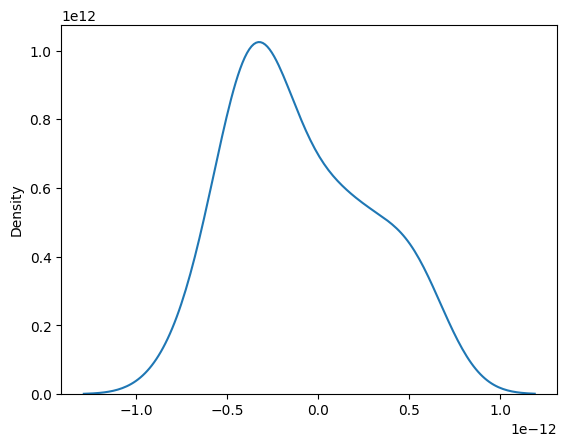

In [134]:
print(residual.skew())
sns.kdeplot(residual)

<Axes: xlabel='None', ylabel='None'>

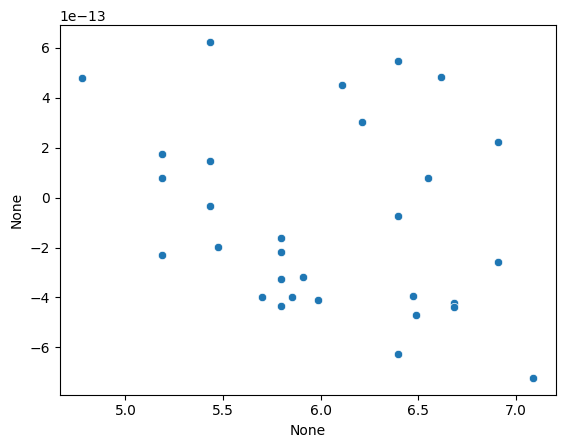

In [135]:
sns.scatterplot(x=y_predict,y=residual)

In [140]:
a = pd.Series(residual,name="Residual")
b = pd.Series(y_predict,name="Y_Predict")

In [143]:
ab = pd.DataFrame(a)

In [144]:
rp = pd.merge(a,b,left_index=True,right_index=True)

In [146]:
print(rp.columns)


Index(['Residual', 'Y_Predict'], dtype='object')


In [147]:
rp['residual'] = residual
rp['y_predict'] = y_predict


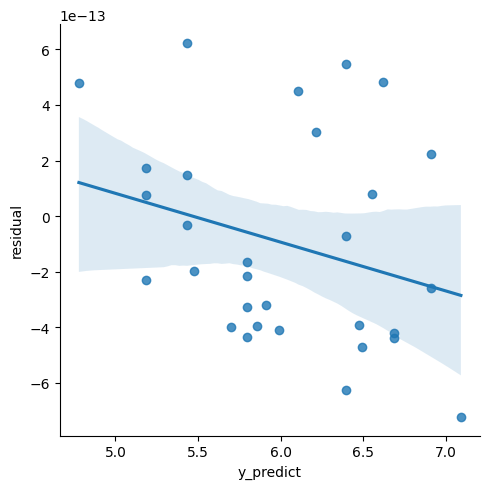

In [148]:
sns.lmplot(data=rp, x='y_predict', y='residual')
